In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.neighbors")
from sklearn.ensemble import BaggingClassifier



In [47]:
data  = pd.read_csv("water_potability.csv")

In [48]:
data.head(10)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0        NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1   3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2   8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3   8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4   9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
5   5.584087  188.313324  28748.687739     7.544869  326.678363    280.467916   
6  10.223862  248.071735  28749.716544     7.513408  393.663396    283.651634   
7   8.635849  203.361523  13672.091764     4.563009  303.309771    474.607645   
8        NaN  118.988579  14285.583854     7.804174  268.646941    389.375566   
9  11.180284  227.231469  25484.508491     9.077200  404.041635    563.885481   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
5        8.399735        54.917862   2.559708           0  
6       13.789695        84.603556   2.672989           0  
7       12.363817        62.798309   4.401425           0  
8       12.706049        53.928846   3.595017           0  
9       17.927806        71.976601   4.370562           0

In [49]:
data.shape

(3276, 10)

#  Data Cleaning

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [51]:
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [52]:
data.fillna(data.mean() , inplace = True)

In [53]:
data

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225        66.396293   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [54]:
data.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [55]:
data.duplicated().sum()


0

### There's No categorical variables to perform one-hot-Encoding that doesn't have ordinal relationship

### There's No categorical variables have ordinal relationship to perform label-Encoding


### Data is balanced according to histogram and the distribution of numerical values on classes 

# EDA (Exploratory Data Analysis)

In [56]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.469956    32.879761   8768.570828     1.583085    36.142612   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.080795   196.967627  20927.833607     7.130299   333.775777   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        15.769881     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        56.647656     3.439711     0.000000  
50%      421.884968       14.218338        66.396293     3.955028     0.000000  
75%      481.792304       16.557652        76.666609     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

### Checking if the dimensionality reduction is required or not using HeatMap 


In [57]:
data.corr()

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.075833 -0.081884    -0.031811  0.014403   
Hardness         0.075833  1.000000 -0.046899    -0.030054 -0.092766   
Solids          -0.081884 -0.046899  1.000000    -0.070148 -0.149840   
Chloramines     -0.031811 -0.030054 -0.070148     1.000000  0.023791   
Sulfate          0.014403 -0.092766 -0.149840     0.023791  1.000000   
Conductivity     0.017192 -0.023915  0.013831    -0.020486 -0.014059   
Organic_carbon   0.040061  0.003610  0.010242    -0.012653  0.026909   
Trihalomethanes  0.002994 -0.012690 -0.008875     0.016627 -0.025605   
Turbidity       -0.036222 -0.014449  0.019546     0.002363 -0.009790   
Potability      -0.003287 -0.013837  0.033743     0.023779 -0.020619   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.017192        0.040061         0.002994  -0.036222   
Hardness            -0.023915        0.003610        -0.012690  -0.014449   
Solids               0.013831        0.010242        -0.008875   0.019546   
Chloramines         -0.020486       -0.012653         0.016627   0.002363   
Sulfate             -0.014059        0.026909        -0.025605  -0.009790   
Conductivity         1.000000        0.020966         0.001255   0.005798   
Organic_carbon       0.020966        1.000000        -0.012976  -0.027308   
Trihalomethanes      0.001255       -0.012976         1.000000  -0.021502   
Turbidity            0.005798       -0.027308        -0.021502   1.000000   
Potability          -0.008128       -0.030001         0.006960   0.001581   

                 Potability  
ph                -0.003287  
Hardness          -0.013837  
Solids             0.033743  
Chloramines        0.023779  
Sulfate           -0.020619  
Conductivity      -0.008128  
Organic_carbon    -0.030001  
Trihalomethanes    0.006960  
Turbidity          0.001581  
Potability         1.000000

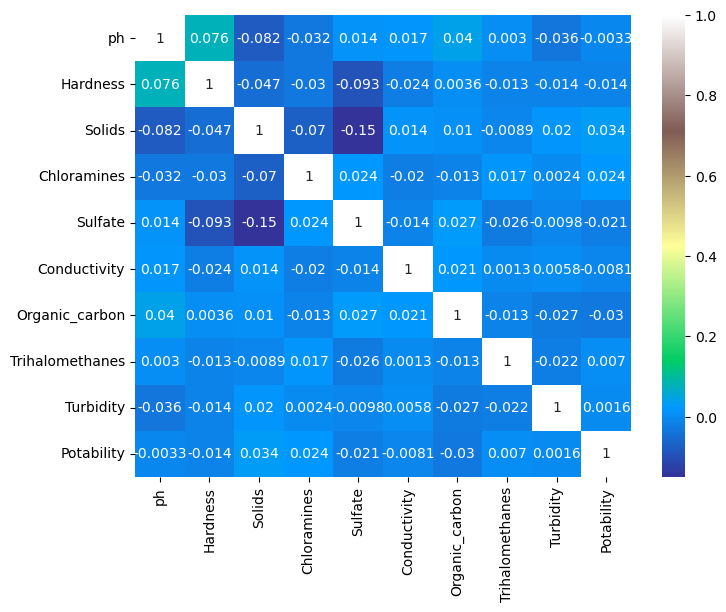

In [58]:
plt.figure(figsize= (8,6))
sns.heatmap(data.corr(),annot=True , cmap = 'terrain')
plt.show()

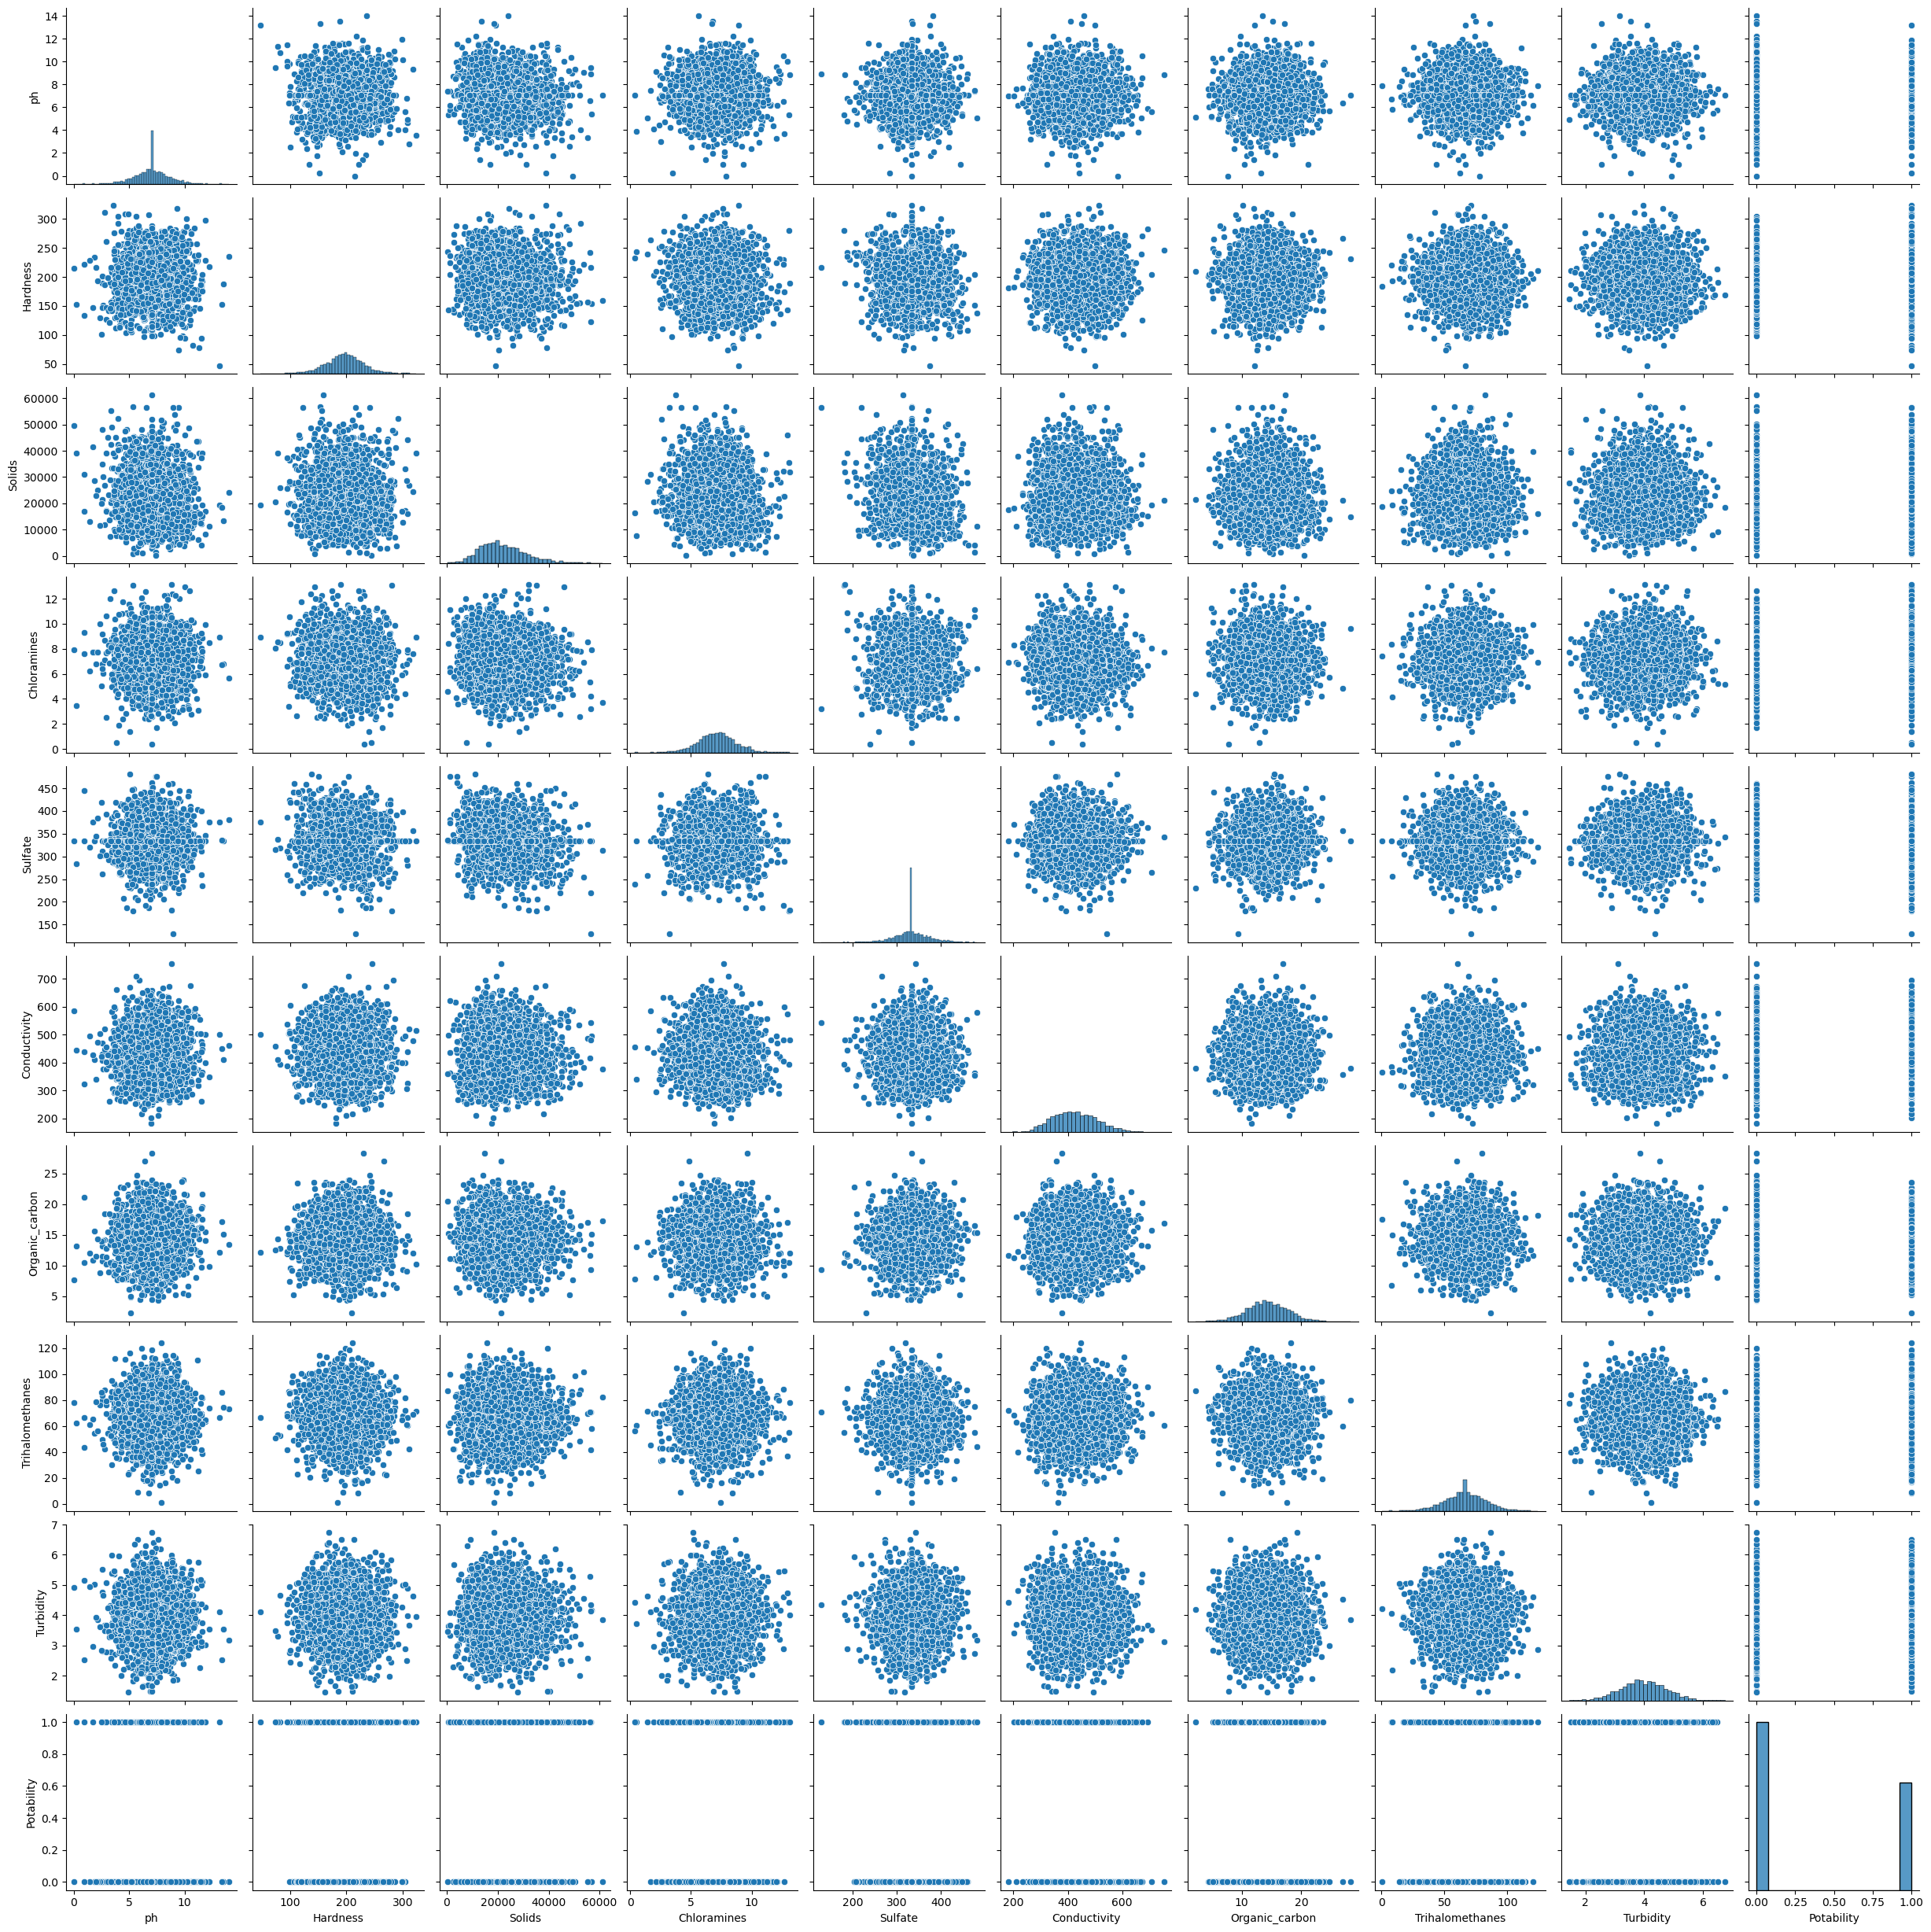

In [59]:
sns.pairplot(data)

### Checking the outliers using box-plot  in case of data cleaning

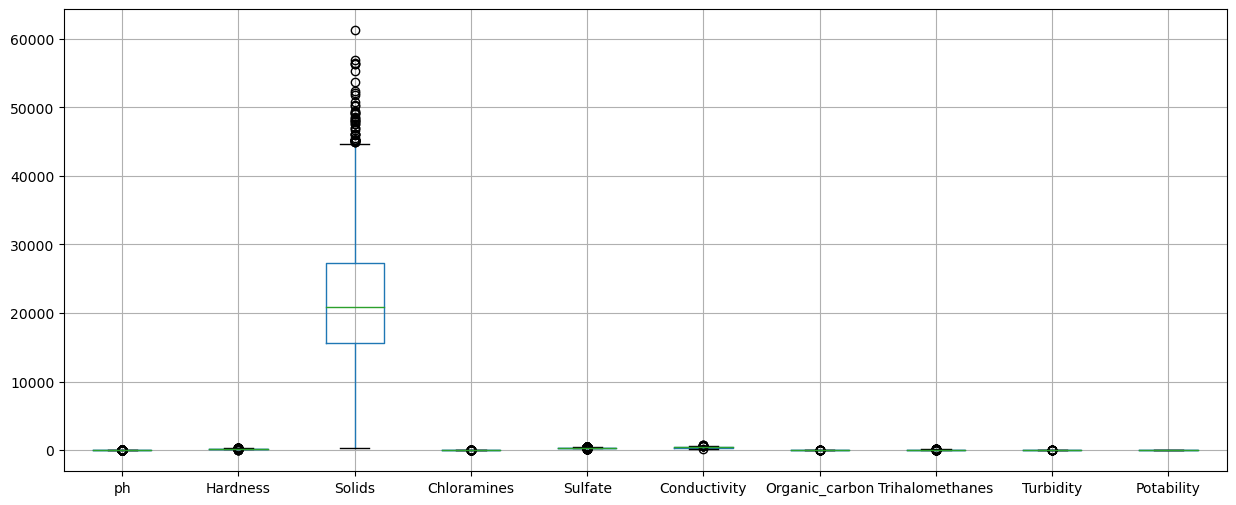

In [60]:
data.boxplot(figsize=(15,6))
plt.show()

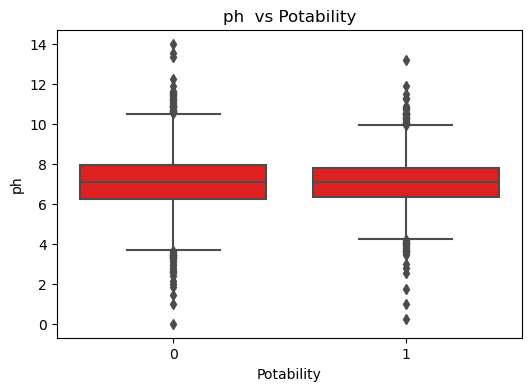

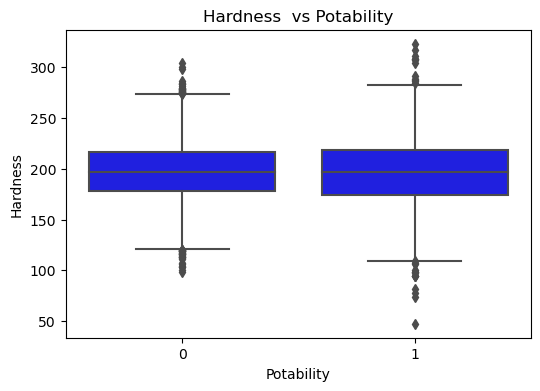

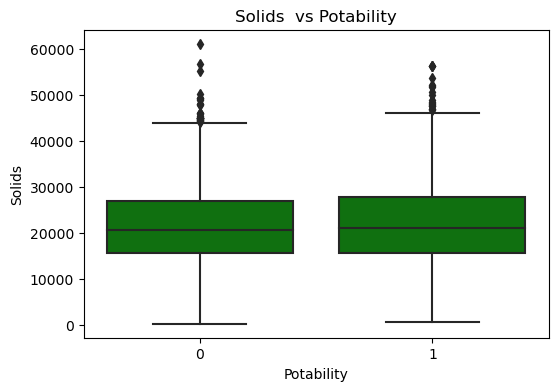

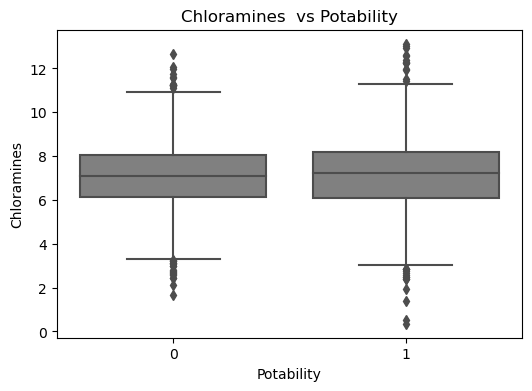

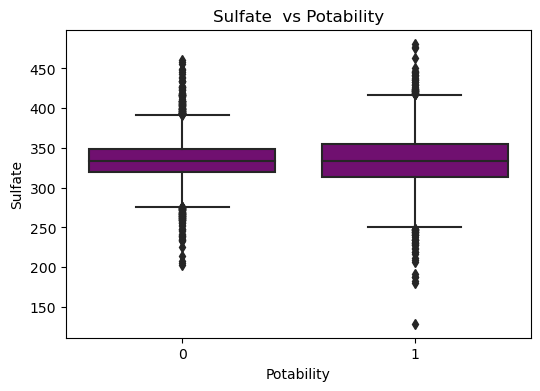

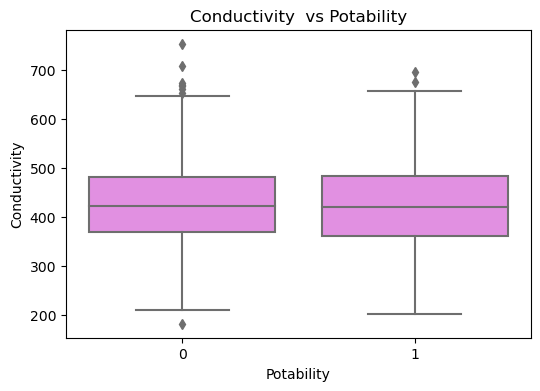

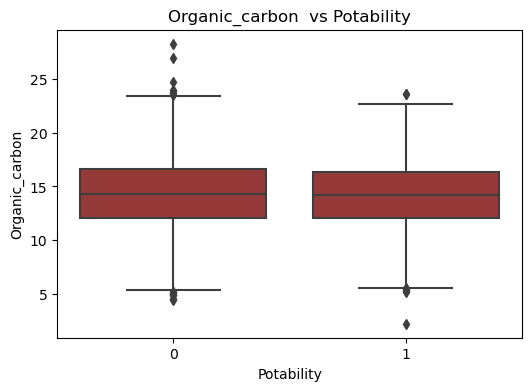

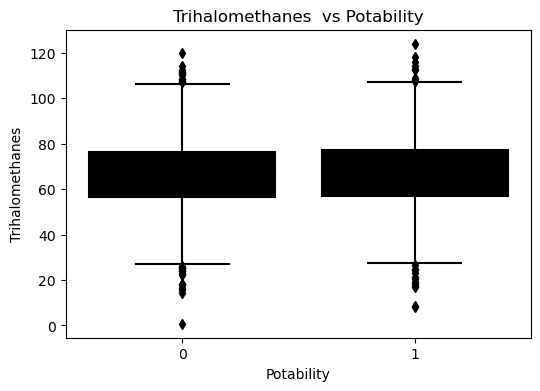

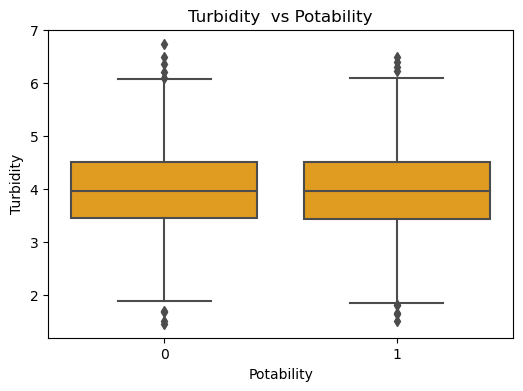

In [61]:
columns=data.select_dtypes(exclude="object").columns
colors=["red","blue","green","grey","purple","violet","brown","black", "orange"]
for i in  range(len(columns)-1):
    plt.figure(figsize=(6,4))
    sns.boxplot(data=data, x=data["Potability"], y=data[columns[i]], color=colors[i])
    plt.title(f"{columns[i]}  vs Potability")
    plt.show()

In [62]:
data['Solids'].describe()

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64

In [63]:
data['ph'].describe()

count    3276.000000
mean        7.080795
std         1.469956
min         0.000000
25%         6.277673
50%         7.080795
75%         7.870050
max        14.000000
Name: ph, dtype: float64

In [64]:
data['Conductivity'].describe()

count    3276.000000
mean      426.205111
std        80.824064
min       181.483754
25%       365.734414
50%       421.884968
75%       481.792304
max       753.342620
Name: Conductivity, dtype: float64

In [65]:
data['Organic_carbon'].describe()

count    3276.000000
mean       14.284970
std         3.308162
min         2.200000
25%        12.065801
50%        14.218338
75%        16.557652
max        28.300000
Name: Organic_carbon, dtype: float64

####  By visualizing the data using BoxPlot there's no Outliers according to the natural range of these features in water require deletion

In [66]:
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

### checking data imbalancement

I:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



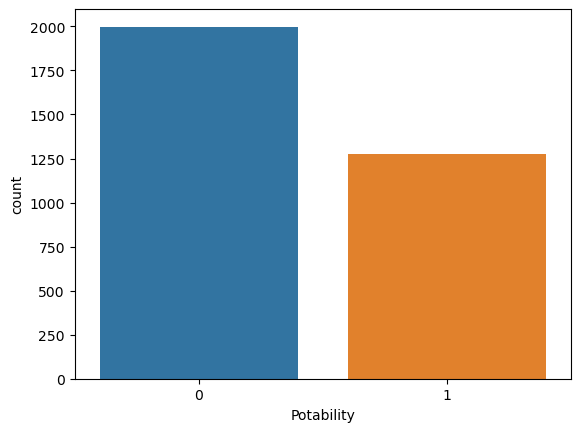

In [69]:
sns.countplot(data['Potability'])
plt.show()

In [70]:
fig = px.pie(data,names = "Potability",hole = 0.3,template ="plotly_dark")
fig.show()

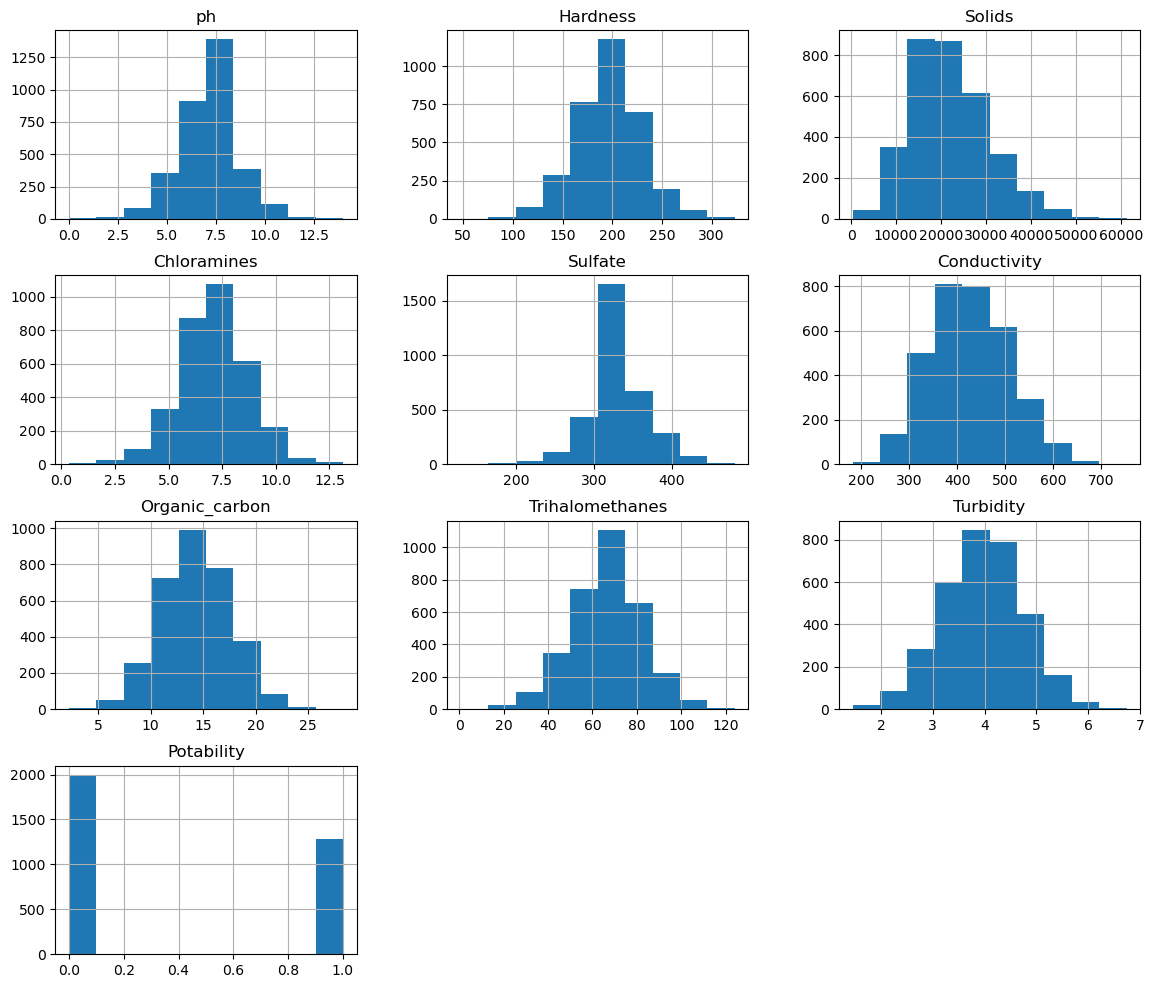

In [71]:
data.hist(figsize=(14,12))
plt.show()

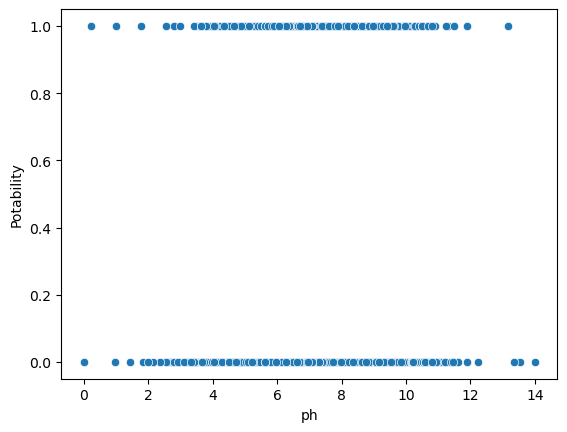

In [72]:
sns.scatterplot(x=data['ph'] , y = data['Potability'])
plt.show()

### Distribution of numerical values with respect to Potability (target class)

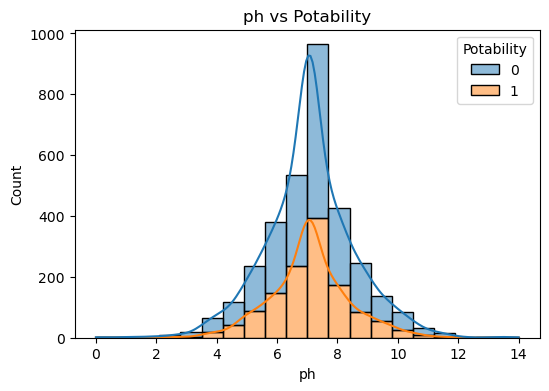

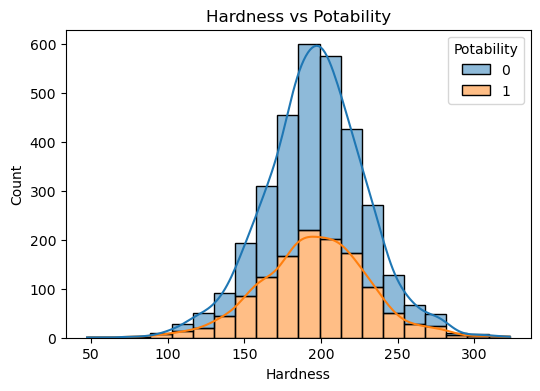

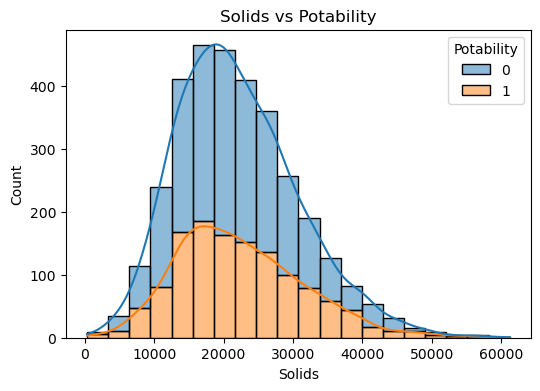

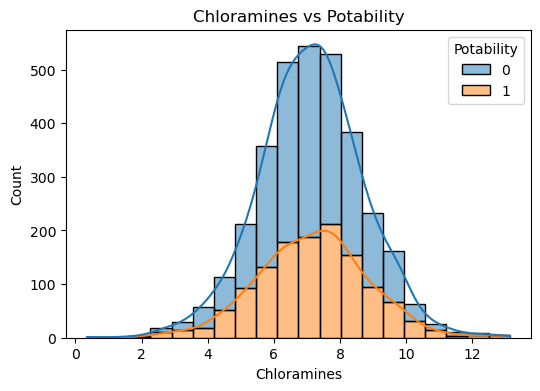

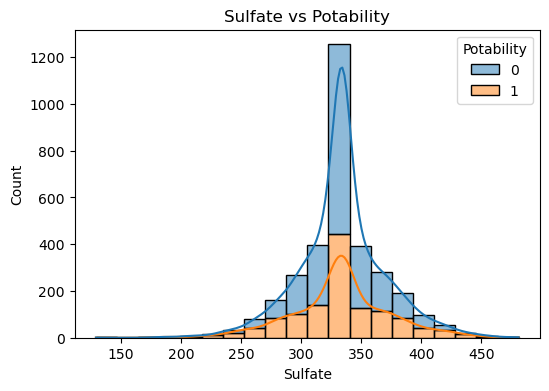

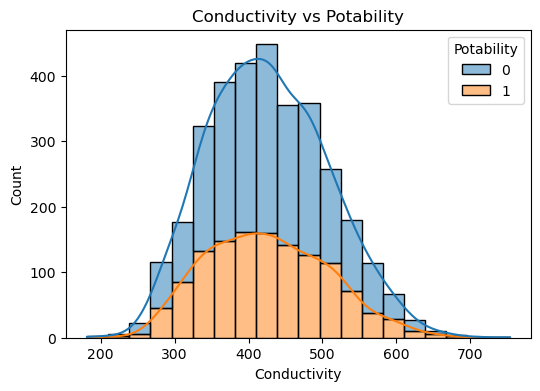

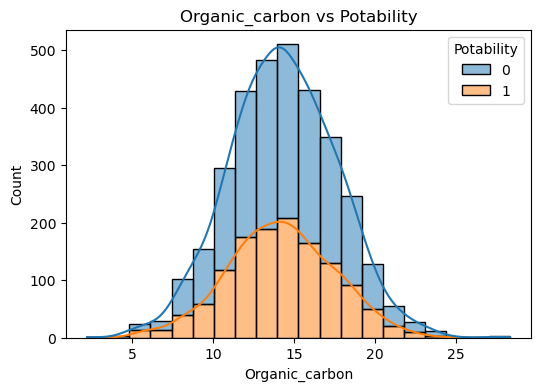

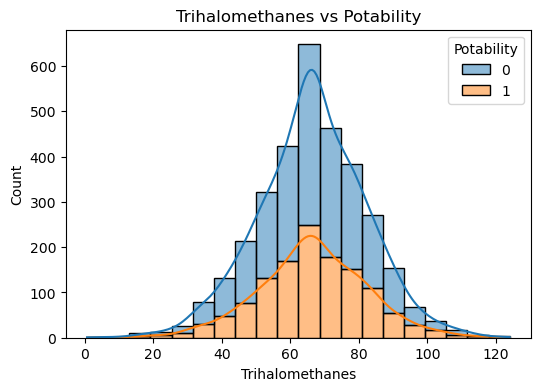

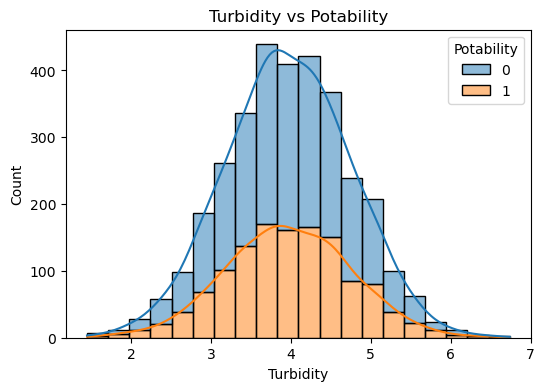

In [73]:
for i in range(len(columns)-1):
    plt.figure(figsize=(6,4))
    sns.histplot(data=data, x=data[columns[i]], hue="Potability", kde=True, color="red", multiple="stack", bins=20)
    plt.title(f"{columns[i]} vs Potability")
    plt.show()

# Data Splitting

In [74]:
data.head(10)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0   7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1   3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2   8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3   8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4   9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
5   5.584087  188.313324  28748.687739     7.544869  326.678363    280.467916   
6  10.223862  248.071735  28749.716544     7.513408  393.663396    283.651634   
7   8.635849  203.361523  13672.091764     4.563009  303.309771    474.607645   
8   7.080795  118.988579  14285.583854     7.804174  268.646941    389.375566   
9  11.180284  227.231469  25484.508491     9.077200  404.041635    563.885481   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
5        8.399735        54.917862   2.559708           0  
6       13.789695        84.603556   2.672989           0  
7       12.363817        62.798309   4.401425           0  
8       12.706049        53.928846   3.595017           0  
9       17.927806        71.976601   4.370562           0

In [75]:
X = data.drop("Potability",axis=1)
Y = data["Potability"]

In [76]:
X.shape , Y.shape

((3276, 9), (3276,))

In [77]:
DataScaler = StandardScaler()
X = DataScaler.fit_transform(X)
X

array([[-1.02733269e-14,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [78]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [79]:
x_train.shape

(2620, 9)

In [80]:
x_test.shape

(656, 9)

# Applying Decision Tree Classifier

In [198]:
DT_model = DecisionTreeClassifier(criterion='entropy')

In [199]:
DT_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [200]:
DT_prediction = DT_model.predict(x_test)

In [201]:
DT_model_accuracy = accuracy_score(y_test,DT_prediction)
DT_model_precision = precision_score(y_test, DT_prediction)
DT_model_recall = recall_score(y_test, DT_prediction)
DT_model_f1 = f1_score(y_test, DT_prediction)
print("Accuracy:", DT_model_accuracy)
print("Precision:", DT_model_precision)
print("Recall:", DT_model_recall)
print("F1 Score:", DT_model_f1)


Accuracy: 0.5929878048780488
Precision: 0.48854961832061067
Recall: 0.4904214559386973
F1 Score: 0.4894837476099426


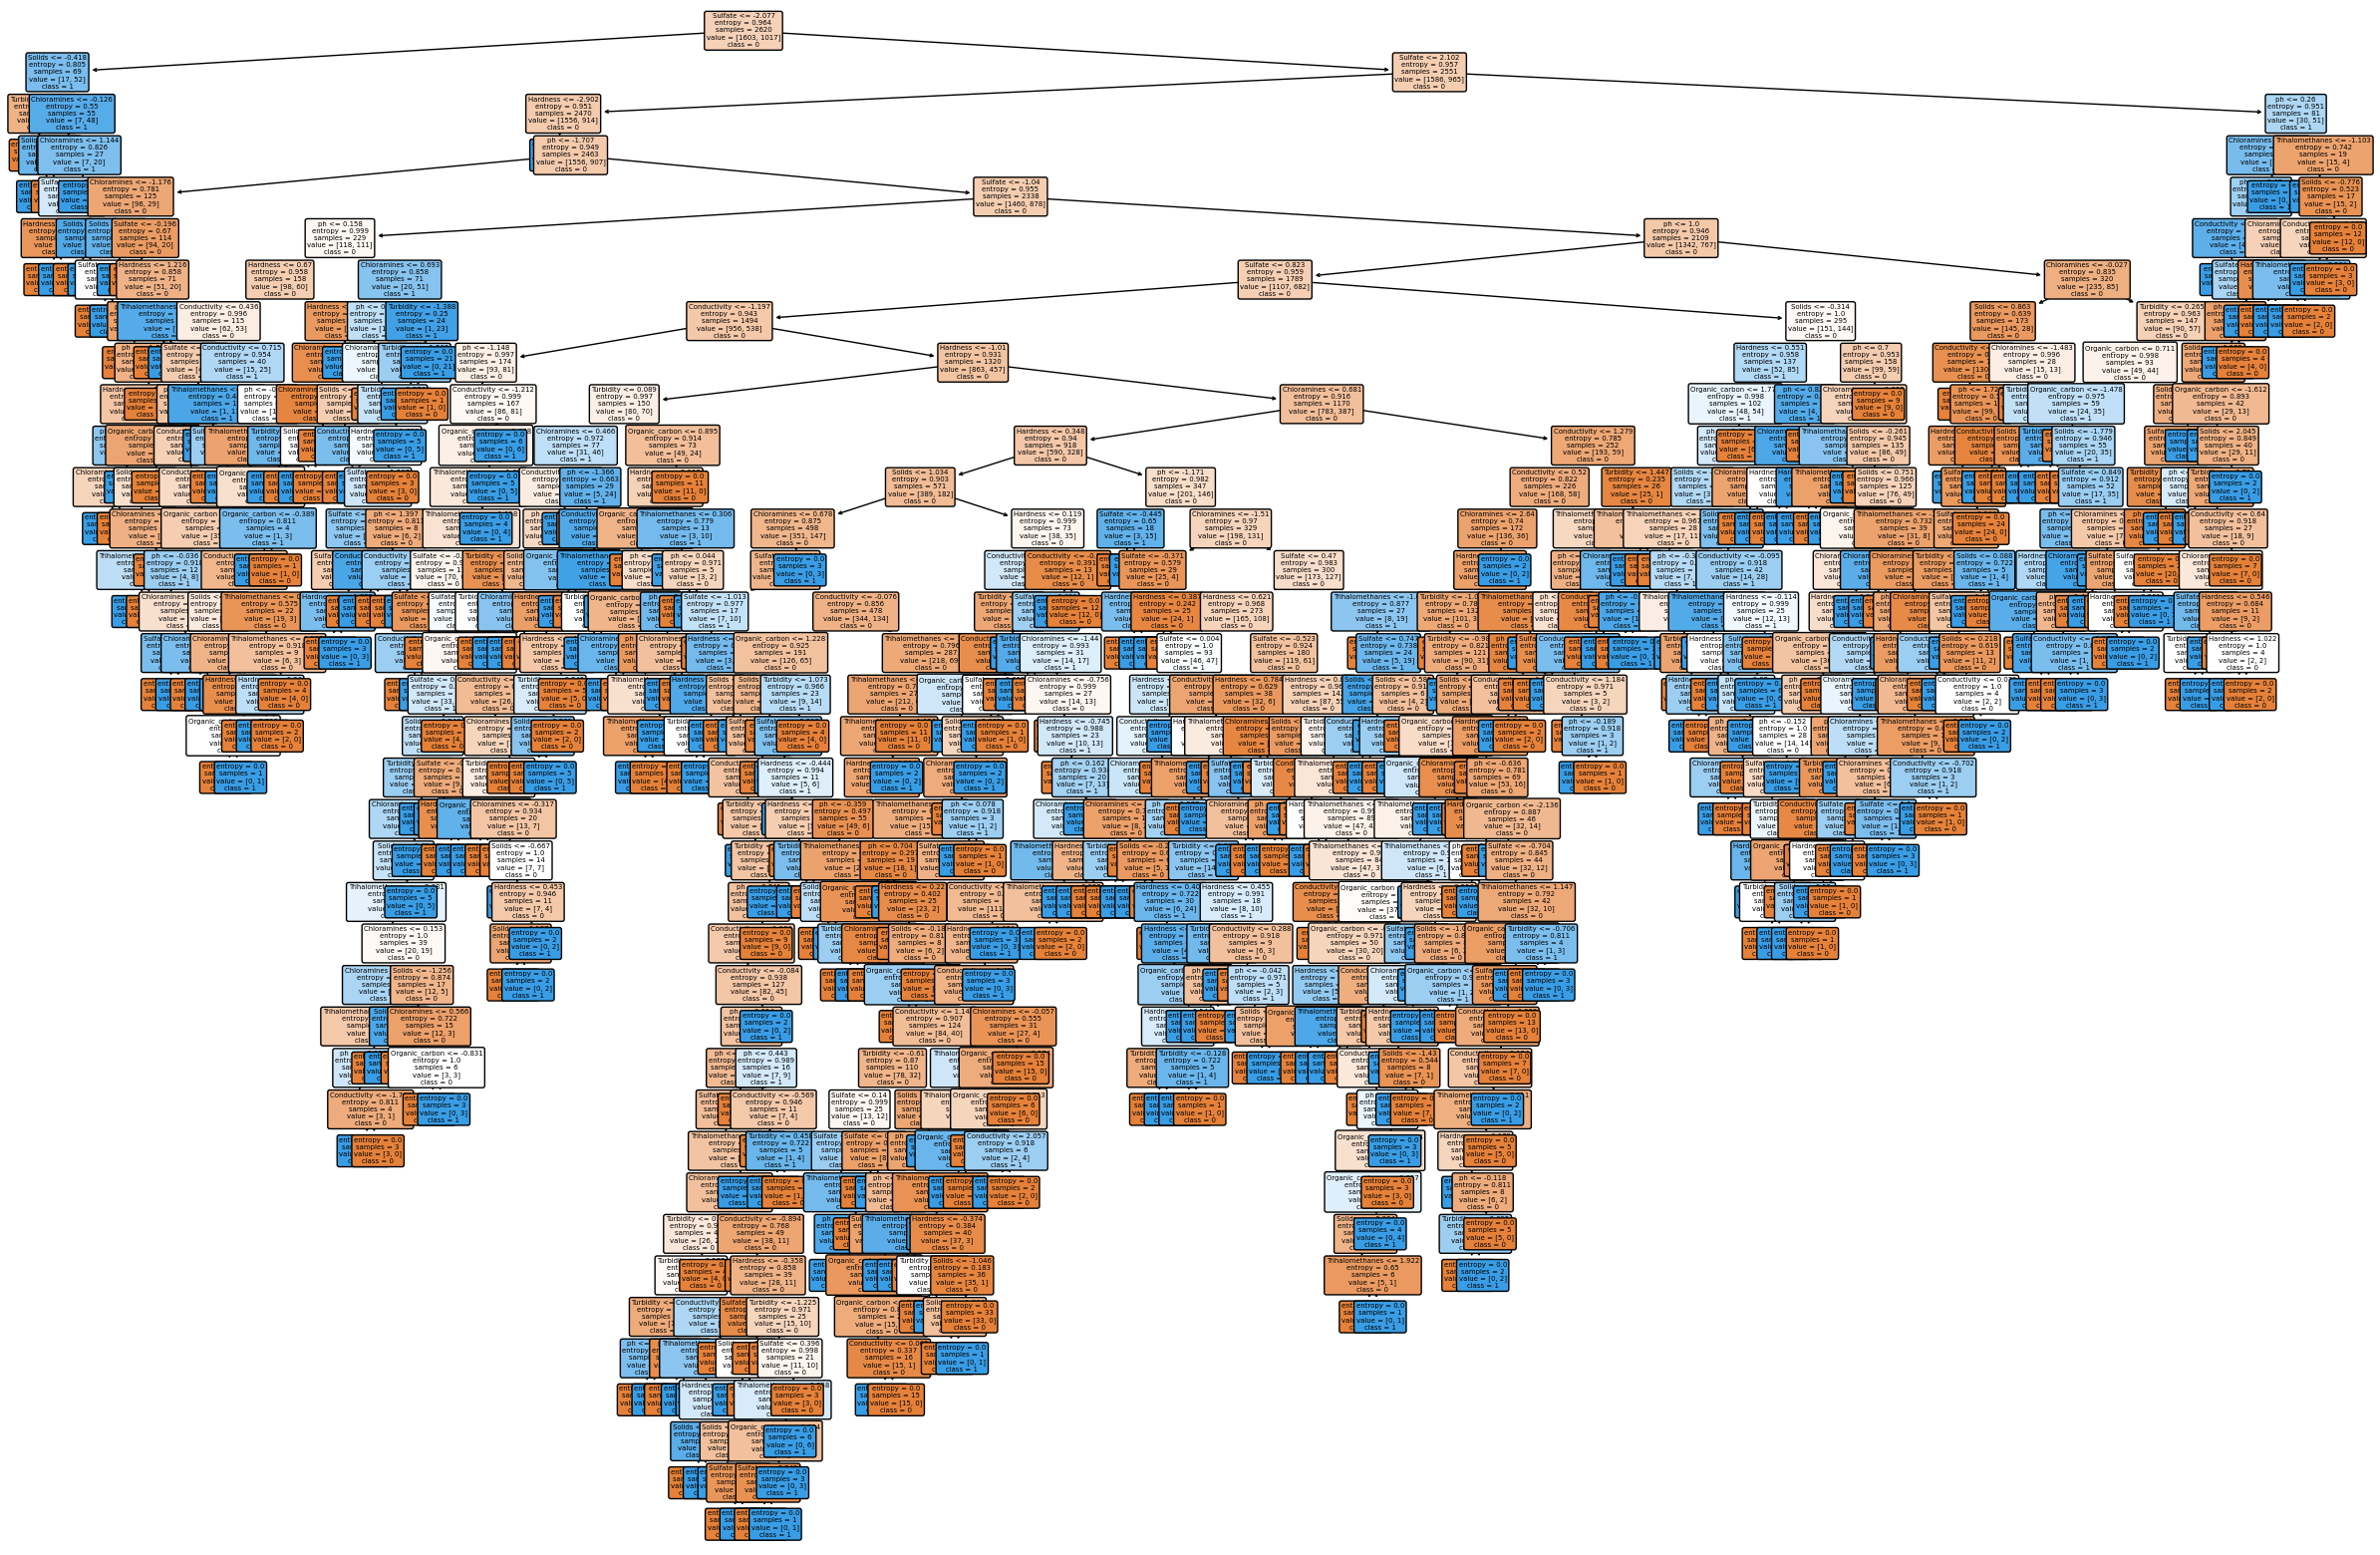

In [233]:
X = pd.DataFrame(X, columns=data.columns[:-1]) 
Y = data["Potability"]

plt.figure(figsize=(30, 20))
plot_tree(DT_model, filled=True, feature_names=X.columns.tolist(), class_names=['0', '1'], rounded=True, fontsize=5)
plt.show()


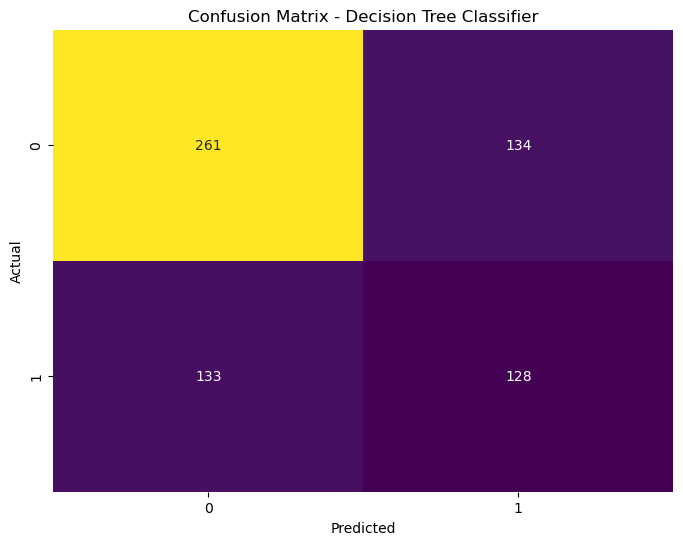

In [232]:
DT_model_confusion_matrix = confusion_matrix(y_test , DT_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(DT_model_confusion_matrix, annot=True, fmt="d", cmap="viridis", cbar=False)
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Applying KNN Classifier

In [197]:
neighbours_range = range(1,21)
for k in neighbours_range:
    KNN_model = KNeighborsClassifier(n_neighbors=k)
    KNN_model.fit(x_train , y_train)
    KNN_prediction=KNN_model.predict(x_test)
    KNN_model_accuracy=accuracy_score(y_test, KNN_prediction)
    print(k , KNN_model_accuracy)

1 0.586890243902439
2 0.6189024390243902
3 0.6082317073170732
4 0.6219512195121951
5 0.6219512195121951
6 0.6189024390243902
7 0.625
8 0.6204268292682927
9 0.6082317073170732
10 0.6204268292682927
11 0.614329268292683
12 0.614329268292683
13 0.6097560975609756
14 0.625
15 0.6173780487804879
16 0.6371951219512195
17 0.6402439024390244
18 0.6402439024390244
19 0.6341463414634146
20 0.6371951219512195


In [215]:
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(x_train, y_train)
KNN_prediction = KNN_model.predict(x_test)
KNN_model_accuracy = accuracy_score(y_test, KNN_prediction)
KNN_model_precision = precision_score(y_test, KNN_prediction)
KNN_model_recall = recall_score(y_test, KNN_prediction)
KNN_model_f1 = f1_score(y_test, KNN_prediction)
KNN_model_classificationReport = classification_report(y_test, KNN_prediction)
print("Accuracy:", KNN_model_accuracy)
print("Precision:", KNN_model_precision)
print("Recall:", KNN_model_recall)
print("F1 Score:", KNN_model_f1)


Accuracy: 0.6082317073170732
Precision: 0.5103092783505154
Recall: 0.3793103448275862
F1 Score: 0.4351648351648351


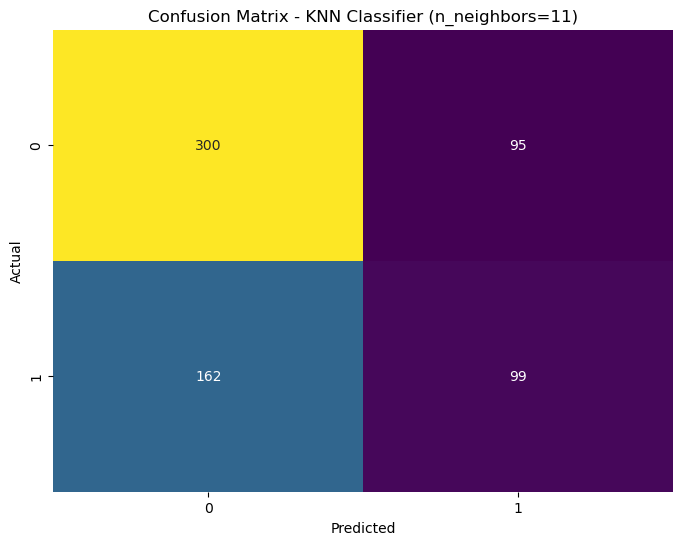

In [216]:
KNN_conf_matrix = confusion_matrix(y_test, KNN_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(KNN_conf_matrix, annot=True, fmt="d", cmap="viridis", cbar=False)
plt.title('Confusion Matrix - KNN Classifier (n_neighbors=11)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Applying Ensamble Learning using Bagging

In [203]:
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


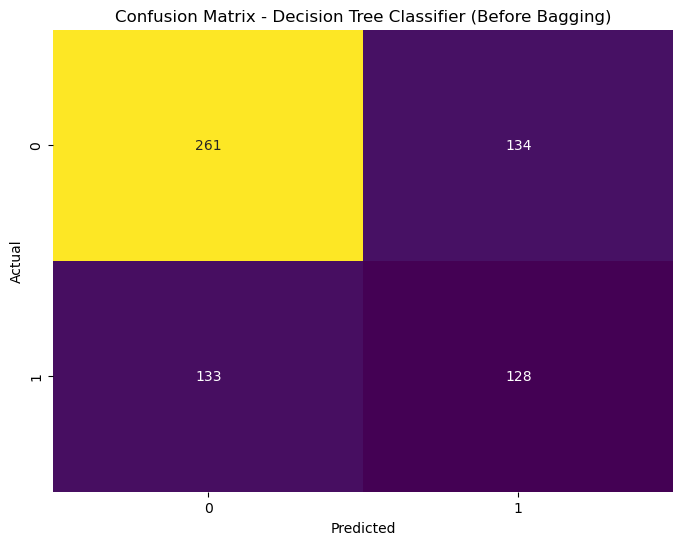

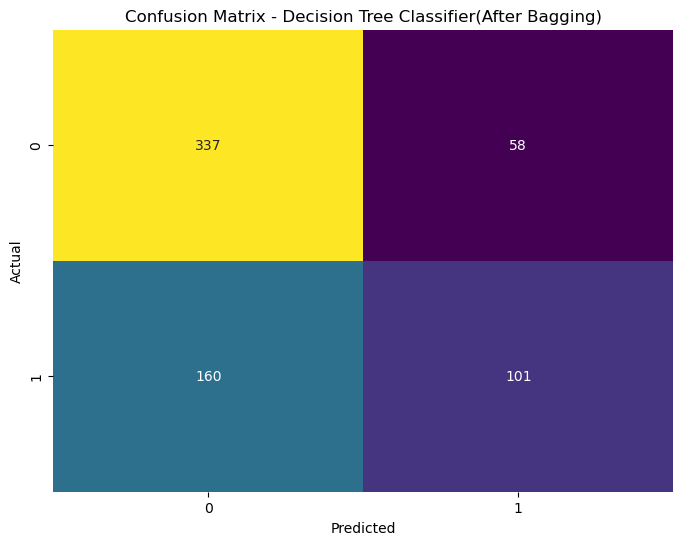

In [204]:
bagged_DT_model = BaggingClassifier(base_estimator=DT_model, n_estimators=100, random_state=42)
# bagged_DT_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_estimators=10, random_state=42)
bagged_DT_model.fit(x_train, y_train)
bagged_DT_prediction = bagged_DT_model.predict(x_test)
bagged_DT_confusion_matrix = confusion_matrix(y_test, bagged_DT_prediction)
DT_accuracy_after = accuracy_score(y_test, bagged_DT_prediction)

# Plot confusion matrix for Decision Tree before bagging
plot_confusion_matrix(DT_model_confusion_matrix, 'Confusion Matrix - Decision Tree Classifier (Before Bagging)')
#Plot confusion matrix for DT after bagging
plot_confusion_matrix(bagged_DT_confusion_matrix , 'Confusion Matrix - Decision Tree Classifier(After Bagging)')

In [205]:
print("\nResults for Decision Tree Classifier before Bagging:")
print(classification_report(y_test, DT_prediction))
print("\nResults for Decision Tree Classifier after Bagging:")
print(classification_report(y_test, bagged_DT_prediction))



Results for Decision Tree Classifier before Bagging:
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       395
           1       0.49      0.49      0.49       261

    accuracy                           0.59       656
   macro avg       0.58      0.58      0.58       656
weighted avg       0.59      0.59      0.59       656


Results for Decision Tree Classifier after Bagging:
              precision    recall  f1-score   support

           0       0.68      0.85      0.76       395
           1       0.64      0.39      0.48       261

    accuracy                           0.67       656
   macro avg       0.66      0.62      0.62       656
weighted avg       0.66      0.67      0.65       656



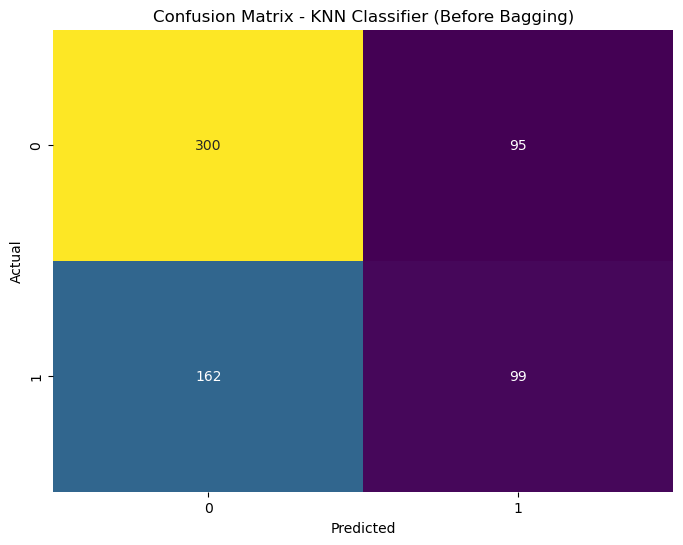

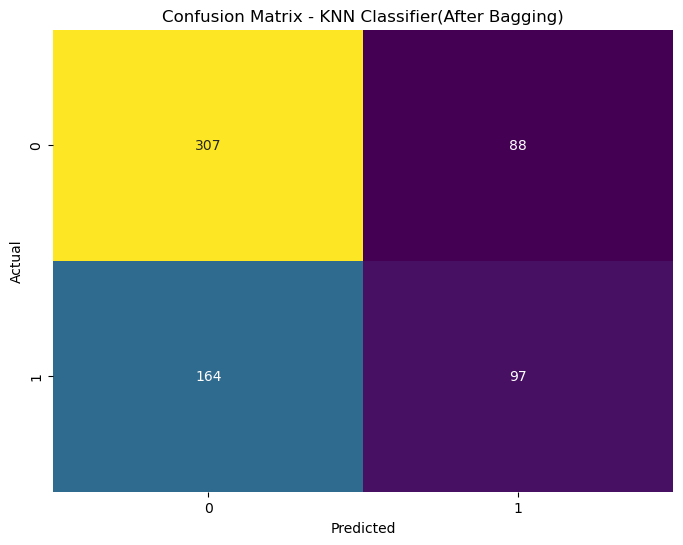

In [217]:
bagged_KNN_model = BaggingClassifier(base_estimator=KNN_model, n_estimators=100, random_state=42)
# bagged_KNN_model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=18), n_estimators=15, random_state=42)
bagged_KNN_model.fit(x_train, y_train)
bagged_KNN_prediction = bagged_KNN_model.predict(x_test)
bagged_KNN_conf_matrix = confusion_matrix(y_test, bagged_KNN_prediction)
KNN_accuracy_after = accuracy_score(y_test, bagged_KNN_prediction)
# Plot confusion matrix for KNN before bagging
plot_confusion_matrix(KNN_conf_matrix, 'Confusion Matrix - KNN Classifier (Before Bagging)')
#Plot confusion matrix for KNN after bagging
plot_confusion_matrix( bagged_KNN_conf_matrix, 'Confusion Matrix - KNN Classifier(After Bagging)')


In [218]:
print("\nResults for KNN Classifier before Bagging:")
print(classification_report(y_test, KNN_prediction))
print("\nResults for KNN Classifier after Bagging:")
print(classification_report(y_test, bagged_KNN_prediction))



Results for KNN Classifier before Bagging:
              precision    recall  f1-score   support

           0       0.65      0.76      0.70       395
           1       0.51      0.38      0.44       261

    accuracy                           0.61       656
   macro avg       0.58      0.57      0.57       656
weighted avg       0.59      0.61      0.59       656


Results for KNN Classifier after Bagging:
              precision    recall  f1-score   support

           0       0.65      0.78      0.71       395
           1       0.52      0.37      0.43       261

    accuracy                           0.62       656
   macro avg       0.59      0.57      0.57       656
weighted avg       0.60      0.62      0.60       656



Model  Accuracy Score
2   Ensembled-DT        0.667683
3  Ensembled-KNN        0.615854
1            KNN        0.608232
0  Decision Tree        0.592988

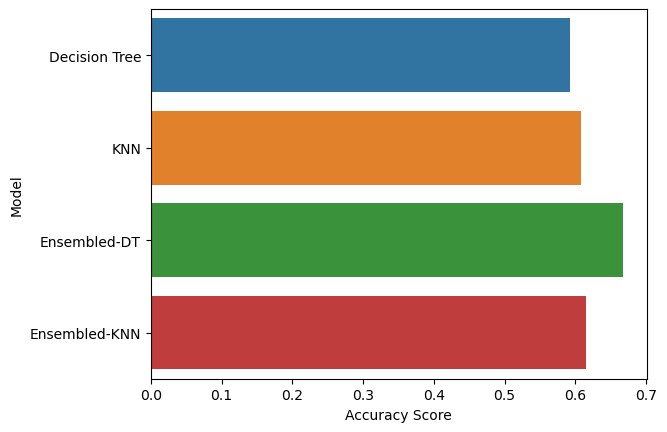

In [219]:
models = pd.DataFrame({
    "Model": [ 
              "Decision Tree",
              "KNN",
              "Ensembled-DT",
                 "Ensembled-KNN"] ,

    "Accuracy Score" : [DT_model_accuracy, KNN_model_accuracy
                        ,DT_accuracy_after,KNN_accuracy_after ]
})
sns.barplot(x="Accuracy Score",y= "Model",data=models)
models.sort_values(by="Accuracy Score",ascending= False)